In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
text = 'Tokenizing text is a core task of NLP.'
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


### 고유정수로 인코딩

In [3]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [4]:
# 고유정수로 매핑
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


### 인코딩 예시

In [5]:
categorical_df = pd.DataFrame({'Name': ['Bumblebee', 'Optimus Prime', 'megatron'],
                              'label ID':[0,1,2]})
categorical_df

,Name,label ID
0,Bumblebee,0
1,Optimus Prime,1
2,megatron,2


In [6]:
# onehot 인코딩 by pandas
pd.get_dummies(categorical_df['Name'])

,Bumblebee,Optimus Prime,megatron
0,1,0,0
1,0,1,0
2,0,0,1


### make by pytorch

In [7]:
import torch
import torch.nn.functional as F

In [8]:
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [9]:
# 확인
print(f'토큰: {tokenized_text[0]}')
print(f'텐서 인덱스: {input_ids[0]}')
print(f'원-핫 인코딩: {one_hot_encodings[0]}')

토큰: T
텐서 인덱스: 5
원-핫 인코딩: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### 작업 간소화

In [10]:
tokenized_text = text.split()
print(tokenized_text)
# NLP.으로 표현됨

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


## 부분단어 토큰화

In [11]:
# AutoTokenizer -> 자동 추출
from transformers import AutoTokenizer
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [12]:
encoded_text = tokenizer(text)
# input_ids -> 고유정수에 맵핑
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


## 토큰이 추가됨
### 1. [CLS] / [SEP] 추가
### 2. 소문자 변경
### 3. tokenizing / NLP 각각 두개의 토큰으로 나뉨

In [13]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [14]:
# 토큰 재결합
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [15]:
# 어휘 사전 크기
tokenizer.vocab_size

30522

In [16]:
# 최대 문맥 크기
tokenizer.model_max_length

512

In [17]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

### 전체 데이터셋 토큰화하기

In [18]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [19]:
from datasets import load_dataset
emotions = load_dataset("emotion")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


No config specified, defaulting to: emotion/split
Found cached dataset emotion (/Users/heewonkim/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [20]:
print(tokenize(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [21]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Loading cached processed dataset at /Users/heewonkim/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-4ad8cf602e7e0c67.arrow
Loading cached processed dataset at /Users/heewonkim/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-bc8335e86e852ab2.arrow
Loading cached processed dataset at /Users/heewonkim/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-a58e5c638054978e.arrow


In [22]:
print(emotions_encoded['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [23]:
from transformers import AutoModel

In [24]:
model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [25]:
# 사전훈련 모델 호출
from transformers import TFAutoModel
tf_model = TFAutoModel.from_pretrained(model_ckpt)

2023-04-24 17:38:04.348651: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 17:38:15.917578: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with 

In [26]:
# 가중치 다운로드 변환('pt'-> pytorch / 'tf' -> tensorflow)
tf_xlmr = TFAutoModel.from_pretrained('xlm-roberta-base', from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


### 마지막 은닉 상태 추출

In [27]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors='pt')

In [28]:
inputs['input_ids']

tensor([[ 101, 2023, 2003, 1037, 3231,  102]])

In [29]:
print(f"입력 텐서 크기: {inputs['input_ids'].size()}")

입력 텐서 크기: torch.Size([1, 6])


In [30]:
inputs.items()

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))])

In [31]:
inputs = {k:v.to(device) for k,v in inputs.items()}

In [32]:
# 그레이디언트 자동 계산 비활성화 -> no_grad()
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)


In [33]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [34]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [35]:
# 은닉 상태 추출
def extract_hidden_states(batch):
    # 모델 입력을 GPU로 옮김
    inputs = {k:v.to(device) for k,v in batch.items()
             if k in tokenizer.model_input_names}
    # 마지막 은닉 상태를 추출
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # [CLS] 토큰에 대한 벡터를 반환
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [36]:
emotions_encoded.set_format('torch',
                           columns=['input_ids','attention_mask','label'])

In [37]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Loading cached processed dataset at /Users/heewonkim/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-d3f9237a632da8c3.arrow
Loading cached processed dataset at /Users/heewonkim/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-b7783244e7929fb9.arrow
Loading cached processed dataset at /Users/heewonkim/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-d54d77c9f33dd010.arrow


In [38]:
emotions_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

### 특성 행렬 만들기

In [39]:
import numpy as np

X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [40]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [41]:
# 특성 스케일을 [0,1] 범위로 조정
X_scaled = MinMaxScaler().fit_transform(X_train)
print(X_scaled.dtype)

float32


In [42]:
X_scaled

array([[0.36425298, 0.58609873, 0.39730027, ..., 0.7459279 , 0.50480545,
        0.69274837],
       [0.4534636 , 0.4561193 , 0.33501157, ..., 0.5397172 , 0.5051364 ,
        0.60421956],
       [0.5296932 , 0.6890426 , 0.6535349 , ..., 0.59325564, 0.48888618,
        0.6854385 ],
       ...,
       [0.4840831 , 0.39301956, 0.57452935, ..., 0.65629464, 0.3932731 ,
        0.6084527 ],
       [0.5580838 , 0.6603528 , 0.64099735, ..., 0.7481152 , 0.43671057,
        0.74880636],
       [0.50531715, 0.58877975, 0.51256526, ..., 0.63666946, 0.495305  ,
        0.5319331 ]], dtype=float32)

In [49]:
# UMAP 객체를 생성하고 훈련
# mapper = UMAP(n_components=2 , metric='cosine').fit(X_scaled)
mapper = UMAP(n_components=2).fit(X_scaled)

In [50]:
# 2D 임베딩의 데이터프레임을 만듬
df_emb = pd.DataFrame(mapper.embedding_, columns=['X','Y'])
df_emb['label'] = y_train
df_emb.head()

,X,Y,label
0,4.671977,6.073649,0
1,-2.626887,4.829459,0
2,5.884209,2.476080,3
3,-1.858752,2.987284,2
4,-2.867573,2.976314,3


### 그림

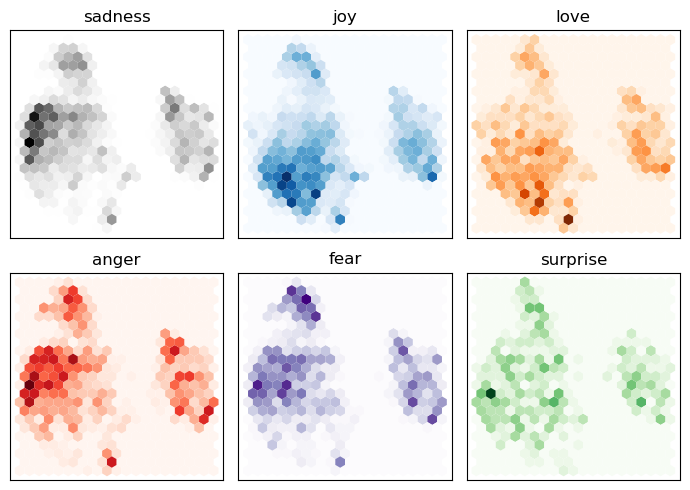

In [56]:
fig, axes = plt.subplots(2,3, figsize=(7,5))
axes = axes.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Purples', 'Greens']
labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap=cmap,
                  gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])
    
plt.tight_layout()
plt.show()
# sadness, anger, fear -> 부정적 감정 다른 분포
# joy, love -> 부정적 감정과 분리되며 비슷한 영역
# surprise -> 전체 영역에 골고루 퍼짐